# Richmond Weather Forecast Using Ridge Regression
## Summary
In this analysis, we'll predict tomorrow's temperature for Richmond, Virginia using historical data acquired from the National Oceanic and Atmospheric Administration (NOAA) <a href="https://www.ncdc.noaa.gov/cdo-web/search">database</a>. First we'll clean the dataset and get it ready for machine learning. Then we'll build a system to make historical predictions and add more predictor variables to improve the model. We'll take a look at the mean absolute error of our model before and after creating additional predictor variables. I did my analysis for Richmond, Virginia near where I live, but you can pull a different dataset from the NOAA database for a local area near you.

## Importing Libraries and Data

In [3]:
# importing libraries
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# importing data and setting index to 'DATE'
weather = pd.read_csv('resources/weather.csv', index_col='DATE')

In [4]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",100.0,100.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-02,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",30.0,10.0,NaN,NaN,NaN,0.00,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",60.0,60.0,NaN,NaN,NaN,0.00,40.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.0,0.0,NaN,NaN,NaN,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",60.0,80.0,NaN,NaN,NaN,0.00,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",NaN,NaN,6.04,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",NaN,NaN,6.71,NaN,NaN,0.17,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",NaN,NaN,7.16,NaN,NaN,0.03,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see the index has been set to 'DATE', but there are a lot of NaN values which we will have to take care of prior to any machine learning. To do this we will first calculate a null percentage.

In [5]:
# calcuting the null percentage by finding the number of null values in each column then dividing by the total number of rows
null_pct = weather.apply(pd.isnull).sum() / weather.shape[0]

In [6]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.517031
ACSH       0.516928
AWND       0.262779
FMTM       0.478859
PGTM       0.329823
PRCP       0.000051
PSUN       0.737323
SNOW       0.057539
SNWD       0.213563
TAVG       0.674390
TMAX       0.000051
TMIN       0.000051
TSUN       0.460005
WDF1       0.783303
WDF2       0.484254
WDF5       0.486617
WDFG       0.588389
WDFM       0.740920
WESD       0.693090
WSF1       0.783303
WSF2       0.484613
WSF5       0.486309
WSFG       0.588081
WSFM       0.740920
WT01       0.507578
WT02       0.941742
WT03       0.907732
WT04       0.987978
WT05       0.978371
WT06       0.990496
WT07       0.995839
WT08       0.740560
WT09       0.997380
WT11       0.997894
WT13       0.857025
WT14       0.955356
WT15       0.997842
WT16       0.669715
WT17       0.996250
WT18       0.968713
WT19       0.999281
WT21       0.995736
WT22       0.998407
WV03       0.999897
dtype: float64

Now we remove any columns were the null_pct is too high.

In [7]:
valid_columns = weather.columns[null_pct < .05]

In [8]:
# columns that have < 5% of null values
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

Next we'll change our weather data to include only the valid_columns.

In [9]:
weather = weather[valid_columns].copy()

In [10]:
weather

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1970-01-01,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,34.0,27.0
1970-01-02,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,42.0,19.0
1970-01-03,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,48.0,24.0
1970-01-04,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,35.0,17.0
1970-01-05,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,47.0,14.0
...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,87.0,48.0
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.17,75.0,56.0
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.03,80.0,59.0


Next we'll change the columns names from uppercase to lowercase for convenience.

In [11]:
weather.columns = weather.columns.str.lower()

In [12]:
weather

,station,name,prcp,tmax,tmin
DATE,,,,,
1970-01-01,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,34.0,27.0
1970-01-02,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,42.0,19.0
1970-01-03,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,48.0,24.0
1970-01-04,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,35.0,17.0
1970-01-05,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,47.0,14.0
...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,87.0,48.0
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.17,75.0,56.0
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.03,80.0,59.0


Next we will forward fill the missing data in our valid_columns by using the .ffill() method

In [13]:
weather = weather.ffill()

In [14]:
# checking the amount of null values after .ffill()
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

Now we'll verify that our datatypes are correct.

In [15]:
# verifying datatypes
weather.dtypes

station     object
name        object
prcp       float64
tmax       float64
tmin       float64
dtype: object

In [16]:
# changing the 'tmax' and 'tmin' to int64
weather.tmax = weather.tmax.astype(int)
weather.tmin = weather.tmin.astype(int)

In [17]:
weather.dtypes

station     object
name        object
prcp       float64
tmax         int32
tmin         int32
dtype: object

In [18]:
# checking the datatype of the index as well
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
       '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16', '2023-04-17'],
      dtype='object', name='DATE', length=19465)

In [19]:
# changing the datatype of the index from 'object' to 'datetime'
weather.index = pd.to_datetime(weather.index)

In [20]:
# verifying the conversion
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11',
               '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-15',
               '2023-04-16', '2023-04-17'],
              dtype='datetime64[ns]', name='DATE', length=19465, freq=None)

Finally we'll make sure we don't have any gaps in our data. To do this we'll count how many of each 'year' we have and sort. Because this request collected weather information daily, we should expect to see value counts of 365 or 366 (accounting for leap years) except for the current year, 2023.

In [21]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    107
Name: DATE, dtype: int64

## Machine Learning
Now we'll "predict" tomorrow's maximum temperature by using the .shift() method which pulls the values of the next row back and assign it to a new column.

In [22]:
# using the .shift() method
weather['target'] = weather.shift(-1)['tmax']

In [23]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1970-01-01,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,34,27,42.0
1970-01-02,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,42,19,48.0
1970-01-03,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,48,24,35.0
1970-01-04,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,35,17,47.0
1970-01-05,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,47,14,37.0
...,...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,87,48,75.0
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.17,75,56,80.0
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.03,80,59,82.0


There is still one null value in our target column because we can't pull from data that we don't have (future days) so instead we will use the .ffill() method again. While this value isn't technically correct, it will only cause a slight issue which will ultimately not make a difference to us. Instead, it will actually help us make future predictions.

In [24]:
# filling in the last day's NaN value with the previous day's value
weather = weather.ffill()

In [25]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1970-01-01,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,34,27,42.0
1970-01-02,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,42,19,48.0
1970-01-03,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,48,24,35.0
1970-01-04,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,35,17,47.0
1970-01-05,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,47,14,37.0
...,...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,87,48,75.0
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.17,75,56,80.0
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.03,80,59,82.0


### Ridge Regression

In [26]:
# checking for multicollinearity
weather.corr()

,prcp,tmax,tmin,target
prcp,1.000000,-0.005677,0.115384,-0.031822
tmax,-0.005677,1.000000,0.903657,0.885154
tmin,0.115384,0.903657,1.000000,0.832393
target,-0.031822,0.885154,0.832393,1.000000


In [27]:
# intitializing the ridge regression model
rr = Ridge(alpha=.1)

In [28]:
# creating predictor columns
predictors = weather.columns[~weather.columns.isin(['target','station','name'])]

In [29]:
predictors

Index(['prcp', 'tmax', 'tmin'], dtype='object')

In [30]:
# using backtesting to account for time-series data
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        # fitting the model to the data
        model.fit(train[predictors], train['target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test['target'], preds], axis=1)
        combined.columns = ['actual', 'prediction']
        combined['diff'] = (combined['prediction'] - combined['actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [31]:
predictions = backtest(weather, rr, predictors)

In [32]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,52.0,61.216583,9.216583
1979-12-31,50.0,54.146510,4.146510
1980-01-01,49.0,52.121824,3.121824
1980-01-02,45.0,52.098436,7.098436
1980-01-03,41.0,47.829296,6.829296
...,...,...,...
2023-04-13,75.0,81.921346,6.921346
2023-04-14,80.0,74.927127,5.072873
2023-04-15,82.0,79.420486,2.579514


Now to see how accurate our model is, we'll generate an accuracy metric called the mean absolute error (MAE). We'll do this by finding the average of our values in the 'diff' column.

In [33]:
mean_absolute_error(predictions['actual'], predictions['prediction'])

6.093303073458796

This means we are, on average, six degrees off from the correct temperature. This isn't very accurate so we'll try adding more predictors. To do this we'll calculate the average temperature and precipitation for the past few days (we'll decide how many). We'll do this to account for those sort of 'outliers' in the weather i.e, when you go outside in the summer and it's surprisingly much cooler than you would have expected or when you go outside in the fall and it's surprisingly much warmer than you would have expected. For whatever meteorological reasons, it's obsevered that the weather isn't always 'similar' to the previous day so we'll create more predictor variables so our model makes a more accurate prediction.

### Making More Predictor Variables

In [34]:
# percent change
def pct_diff(old, new):
    return (new - old) / old

# rolling averages per period ('horizon') per column (attribute)
def compute_rolling(weather, horizon, col):
    label = f'rolling_{horizon}_{col}'
    
    # making a new column with the rolling average of the desired 'horizon' against attribute
    weather[label] = weather[col].rolling(horizon).mean()
    
    # making a new column that calculates the percentage difference between the current day and the rolling average using our 'pct_diff' function
    weather[f'{label}_pct'] = pct_diff(weather[label], weather[col])
    return weather

# creating our desired horizons
rolling_horizons = [3, 14]

# creating a loop to iterate through our desired horizons for our desired attributes
for horizon in rolling_horizons:
    for col in ['tmax', 'tmin', 'prcp']:
        weather = compute_rolling(weather, horizon, col)

Now when we check our 'weather' dataframe, we'll see our new columns for our 3-day horizon and our 14-day horizon:

##### Rolling 3-Day
* rolling_3_tmax, rolling_3_tmax_pct
* rolling_3_tmin, rolling_3_tmin_pct
* rolling_3_prcp, rolling_3_prcp_pct

##### Rolling 14-Day

* rolling_14_tmax, rolling_14_tmax_pct
* rolling_14_tmin, rolling_14_tmin_pct
* rolling_14_prcp, rolling_14_prcp_pct

In [35]:
weather

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,
1970-01-01,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,34,27,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,42,19,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,48,24,35.0,41.333333,0.161290,23.333333,0.028571,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,35,17,47.0,41.666667,-0.160000,20.000000,-0.150000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,47,14,37.0,43.333333,0.084615,18.333333,-0.236364,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,87,48,75.0,82.666667,0.052419,45.000000,0.066667,5.921189e-16,-1.000000,73.214286,0.188293,46.500000,0.032258,0.087857,-1.000000
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.17,75,56,80.0,82.000000,-0.085366,51.333333,0.090909,5.666667e-02,2.000000,73.571429,0.019417,47.714286,0.173653,0.090714,0.874016
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.03,80,59,82.0,80.666667,-0.008264,54.333333,0.085890,6.666667e-02,-0.550000,73.857143,0.083172,48.071429,0.227340,0.070000,-0.571429


In our new dataframe we see new NaN values for the first couple of weeks. This is because if we are creating a rolling average based on the past 14 days, our function can't grab data that doesn't exist before our dataset starts. To handle these missing values we'll delete these rows.

In [36]:
weather = weather.iloc[14:,:]

In [37]:
weather

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,
1970-01-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,38,19,51.0,42.000000,-0.095238,18.666667,0.017857,0.000000e+00,NaN,35.928571,0.057654,15.571429,0.220183,0.041429,-1.000000
1970-01-16,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,51,16,50.0,45.333333,0.125000,19.333333,-0.172414,0.000000e+00,NaN,36.571429,0.394531,15.357143,0.041860,0.041429,-1.000000
1970-01-17,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.15,50,25,57.0,46.333333,0.079137,20.000000,0.250000,5.000000e-02,2.000000,36.714286,0.361868,15.428571,0.620370,0.052143,1.876712
1970-01-18,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.28,57,31,31.0,52.666667,0.082278,24.000000,0.291667,1.433333e-01,0.953488,38.285714,0.488806,16.428571,0.886957,0.072143,2.881188
1970-01-19,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,31,22,23.0,46.000000,-0.326087,26.000000,-0.153846,1.433333e-01,-1.000000,37.142857,-0.165385,17.000000,0.294118,0.072143,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,87,48,75.0,82.666667,0.052419,45.000000,0.066667,5.921189e-16,-1.000000,73.214286,0.188293,46.500000,0.032258,0.087857,-1.000000
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.17,75,56,80.0,82.000000,-0.085366,51.333333,0.090909,5.666667e-02,2.000000,73.571429,0.019417,47.714286,0.173653,0.090714,0.874016
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.03,80,59,82.0,80.666667,-0.008264,54.333333,0.085890,6.666667e-02,-0.550000,73.857143,0.083172,48.071429,0.227340,0.070000,-0.571429


We still have some NaN values displaying in the percentage columns that appear because of a divsion 'of' or 'by' zero. To fix this, we'll replace the NaN values with zero with the .fillna() method.

In [38]:
weather = weather.fillna(0)

We'll continue making additional predictor variables. First we'll find the averages for each attribute **up to** a specific date. If we find the average for each attribute for all dates then it will add bias to our data, and ultimately our outcome, because we would be calculating with future data that we wouldn't have had at that time.

In [39]:
def expand_mean(df):
    return df.expanding(1).mean()

# iterating through each attribute, grouping by month, then finding the average of all of the dates before that given date
for col in ['tmax', 'tmin', 'prcp']:
    weather[f'month_avg_{col}'] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f'day_avg_{col}'] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

Now when we check our 'weather' dataframe, we'll see our new columns for our monthly and daily averages per attribute:

##### Monthly Averages
* month_avg_tmax
* month_avg_tmin
* month_avg_prcp

##### Daily Averages
* day_avg_tmax
* day_avg_tmin
* day_avg_prcp

In [40]:
weather

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,38,19,51.0,42.000000,-0.095238,18.666667,0.017857,...,15.571429,0.220183,0.041429,-1.000000,38.000000,38.000000,19.000000,19.000000,0.000000,0.000000
1970-01-16,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,51,16,50.0,45.333333,0.125000,19.333333,-0.172414,...,15.357143,0.041860,0.041429,-1.000000,44.500000,51.000000,17.500000,16.000000,0.000000,0.000000
1970-01-17,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.15,50,25,57.0,46.333333,0.079137,20.000000,0.250000,...,15.428571,0.620370,0.052143,1.876712,46.333333,50.000000,20.000000,25.000000,0.050000,0.150000
1970-01-18,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.28,57,31,31.0,52.666667,0.082278,24.000000,0.291667,...,16.428571,0.886957,0.072143,2.881188,49.000000,57.000000,22.750000,31.000000,0.107500,0.280000
1970-01-19,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,31,22,23.0,46.000000,-0.326087,26.000000,-0.153846,...,17.000000,0.294118,0.072143,-1.000000,45.400000,31.000000,22.600000,22.000000,0.086000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,87,48,75.0,82.666667,0.052419,45.000000,0.066667,...,46.500000,0.032258,0.087857,-1.000000,70.635683,71.240741,46.121647,46.907407,0.105140,0.102963
2023-04-14,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.17,75,56,80.0,82.000000,-0.085366,51.333333,0.090909,...,47.714286,0.173653,0.090714,0.874016,70.638404,69.703704,46.127805,46.333333,0.105181,0.113519
2023-04-15,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.03,80,59,82.0,80.666667,-0.008264,54.333333,0.085890,...,48.071429,0.227340,0.070000,-0.571429,70.644237,69.981481,46.135826,46.370370,0.105134,0.248704


Now that we have our additional set of predictor variables we can add them into our 'predictors' variable that we created earlier.

In [41]:
predictors = weather.columns[~weather.columns.isin(['target','station','name'])]

In [42]:
# looking at our new predictors
predictors

Index(['prcp', 'tmax', 'tmin', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp',
       'rolling_3_prcp_pct', 'rolling_14_tmax', 'rolling_14_tmax_pct',
       'rolling_14_tmin', 'rolling_14_tmin_pct', 'rolling_14_prcp',
       'rolling_14_prcp_pct', 'month_avg_tmax', 'day_avg_tmax',
       'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp', 'day_avg_prcp'],
      dtype='object')

In [43]:
# using the new predictor variables in our 'backtest' function
predictions = backtest(weather, rr, predictors)

In [44]:
# looking at our new mean absolute error with our additional predictor variables
mean_absolute_error(predictions['actual'], predictions['prediction'])

5.664039499071775

This time we got a lower mean absolute error, but let's take a look at the 'diff' column and sort from highest to lowest to see where our prediction had the most errors.

In [45]:
predictions.sort_values('diff', ascending=False)

,actual,prediction,diff
DATE,,,
2014-01-06,22.0,54.237980,32.237980
2014-01-27,27.0,58.215133,31.215133
1982-03-16,82.0,51.145045,30.854955
1989-02-13,73.0,42.618325,30.381675
1980-12-19,28.0,57.813505,29.813505
...,...,...,...
1983-11-06,59.0,59.002848,0.002848
2006-06-08,84.0,84.001741,0.001741
1985-08-30,88.0,87.998269,0.001731


Our biggest errors would be on days where the days before and after were much lower. We can look into this by honing in on a specific timeframe. Let's look at '2014-01-01' to '2014-01-11'.

In [46]:
weather.loc['2014-01-01':'2014-01-11']

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2014-01-01,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,49,26,45.0,51.666667,-0.051613,31.333333,-0.170213,...,34.642857,-0.249485,0.187143,-1.000000,47.150999,51.204545,28.039230,32.431818,0.105137,0.127273
2014-01-02,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.41,45,30,35.0,48.333333,-0.068966,28.666667,0.046512,...,34.714286,-0.135802,0.216429,0.894389,47.149408,47.931818,28.040680,30.045455,0.105362,0.103182
2014-01-03,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,35,19,39.0,43.000000,-0.186047,25.000000,-0.240000,...,33.142857,-0.426724,0.216429,-1.000000,47.140429,47.318182,28.033999,28.795455,0.105285,0.141818
2014-01-04,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,39,16,61.0,39.666667,-0.016807,21.666667,-0.261538,...,30.714286,-0.479070,0.216429,-1.000000,47.134417,48.681818,28.025111,30.090909,0.105207,0.090909
2014-01-05,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.05,61,37,63.0,45.000000,0.355556,24.000000,0.541667,...,28.928571,0.279012,0.172143,-0.709544,47.144649,48.181818,28.031734,29.795455,0.105166,0.093864
2014-01-06,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.37,63,18,22.0,54.333333,0.159509,23.666667,-0.239437,...,27.142857,-0.336842,0.155714,1.376147,47.156342,48.545455,28.024336,28.613636,0.105361,0.122045
2014-01-07,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,22,10,36.0,48.666667,-0.547945,21.666667,-0.538462,...,25.857143,-0.613260,0.155714,-1.000000,47.137804,48.340909,28.011054,30.227273,0.105284,0.124091
2014-01-08,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,36,13,47.0,40.333333,-0.107438,13.666667,-0.048780,...,25.214286,-0.484419,0.155714,-1.000000,47.129602,46.159091,28.000000,28.340909,0.105206,0.162045
2014-01-09,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",0.00,47,27,41.0,35.000000,0.342857,16.666667,0.620000,...,25.642857,0.052925,0.155714,-1.000000,47.129507,46.159091,27.999264,27.363636,0.105129,0.090227


When we look at the 'tmax' column above, we can see how random some of the temperatures seem; going from 39F to 61F or 63F to 22F. As I mentioned earlier, for whatever meteorological reasons, it's obsevered that the weather isn't always 'similar' to the previous day.

Finally we can find out how often we fall into each error bucket.

In [47]:
# rounding off the values in the 'diff' column and then counting and sorting by error amount
predictions['diff'].round().value_counts().sort_index()

0.0      931
1.0     1848
2.0     1842
3.0     1660
4.0     1506
5.0     1362
6.0     1191
7.0      994
8.0      859
9.0      715
10.0     564
11.0     485
12.0     427
13.0     317
14.0     275
15.0     214
16.0     159
17.0     118
18.0      88
19.0      64
20.0      54
21.0      40
22.0      24
23.0      14
24.0      26
25.0       7
26.0       6
27.0       2
28.0       3
29.0       1
30.0       2
31.0       2
32.0       1
Name: diff, dtype: int64

We can also quickly plot this to better visualize where the different errors happened.

<AxesSubplot:>

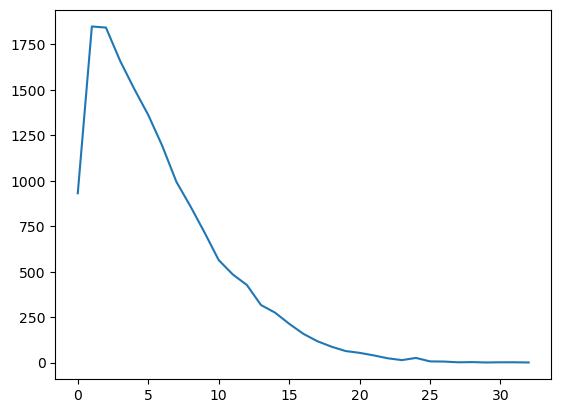

In [48]:
predictions['diff'].round().value_counts().sort_index().plot()

As we can see, most of our model's errors were between 1% and 6%, but still with large amounts of errors of higher percentages which ultimately influenced the mean absolute error. To improve the accuracy of our model we could do several different things like processing our original null values from the columns that we excluded because of a null_pct > .05. We could also try creating more predictor variables or changing the type of model we use in the first place.

(end)